# The wine recognition dataset
The <a href="https://www.kaggle.com/brynja/wineuci">**wine recognition**</a> dataset from UC Irvine is the result of a chemical analysis of several wines grown in the same region in Italy  but derived from three different cultivars. The analysis determined quantities of 13 constituents found in each of the three types of wines.

* Features variables
    * **alcohol**: wine's alcohol composition
    * **malic_acid**: wine's malic acid composition
    * **ash**: wine's ash composition
    * **alcalinity_ash**: Alcalinity of ash
    * **magnesium**: wine's magnesium composition
    * **total_phenols**: number of phenols in the wine
    * **flavanoids**: number of flavanoid phenols in the wine
    * **nonflavanoids**: number of nonflavanoid phenols in the wine
    * **proanthocyanins**: wine's proanthocyanins composition
    * **color_intensity**: wine's color intensity
    * **hue**: wine's color hue
    * **od280_od315**: OD280/OD315 of diluted wines
    * **prolin**: wine's prolin composition
    

* Variable to predict:
    * **class**: The wine's variety

#### Objective
Our objective is to produce a good classificator of these 3 wine varieties.

#### Table of contents
<ol>
    <li><a href="#preprocessing">Preprocessing</a></li>
    <li><a href="#exploratory_data_analysis">Exploratory data analysis</a></li>
        2.1. <a href="#univariate_analysis">Univariate analysis</a><br>
        2.2. <a href="#bivariate_analysis">Bivariate analysis</a><br>
    <li><a href="#regression_analysis">Classification</a></li>
        3.1. <a href="#linear_regression">SVM</a><br>
        3.2. <a href="#lasso_regression">Decision tree</a><br>
        3.3. <a href="#knn">KNN</a><br>
        3.4. <a href="#naive_bayes">Naïve Bayes</a><br>
    <li><a href="#estimator_evaluation">Estimator evaluation</a></li>
</ol>

-----

In [ ]:
import pandas as pd

df = pd.read_csv("wine.csv")

print(df.shape)

(178, 14)


<h2 id="#preprocessing">1 - Preprocessing</h2>

In [ ]:
df.dtypes

class                int64
alcohol            float64
malic_acid         float64
ash                float64
alcalinity_ash     float64
magnesium            int64
total_phenols      float64
flavanoids         float64
nonflavanoids      float64
proanthocyanins    float64
color_intensity    float64
hue                float64
od280_od315        float64
prolin               int64
dtype: object

<h2 id="#exploratory_data_analysis">2 - Exploratory data analysis</h2>

In [ ]:
df.drop(["class"], axis="columns").describe()

,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflavanoids,proanthocyanins,color_intensity,hue,od280_od315,prolin
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<h3 id="#univariate_analysis">2.1 - Univariate analysis</h3>

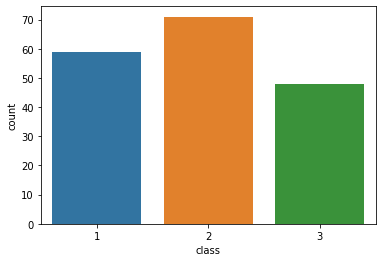

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

sns.countplot(x="class", data=df)

plt.show()

We observe that we have a balanced classification problem

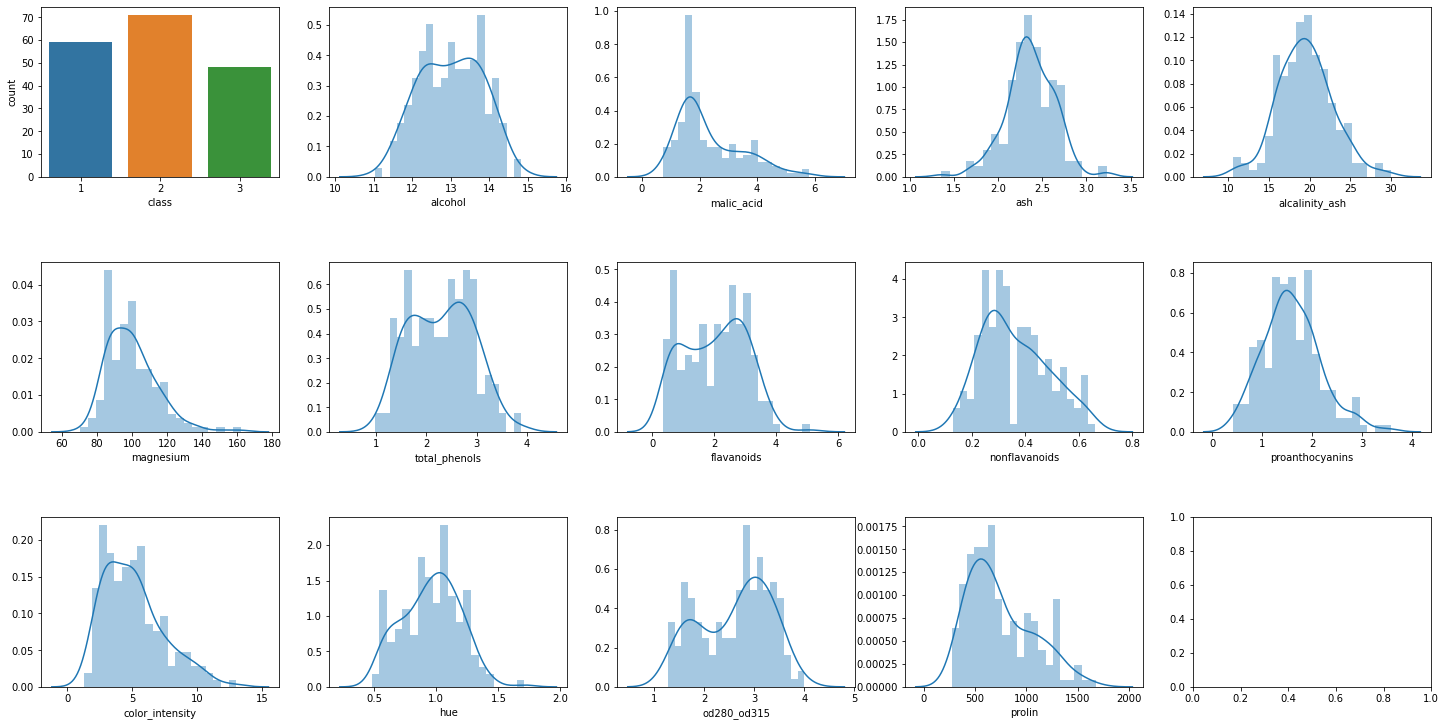

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
axs = axs.flatten() # 

index = 0
for k,v in df.items(): 
    if k == "class":
        sns.countplot(v, ax=axs[index])
    else:
        sns.distplot(v, bins=20, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<h3 id="#bivariate_analysis">2.2 - Bivariate analysis</h3>

##### Normalized mutual information

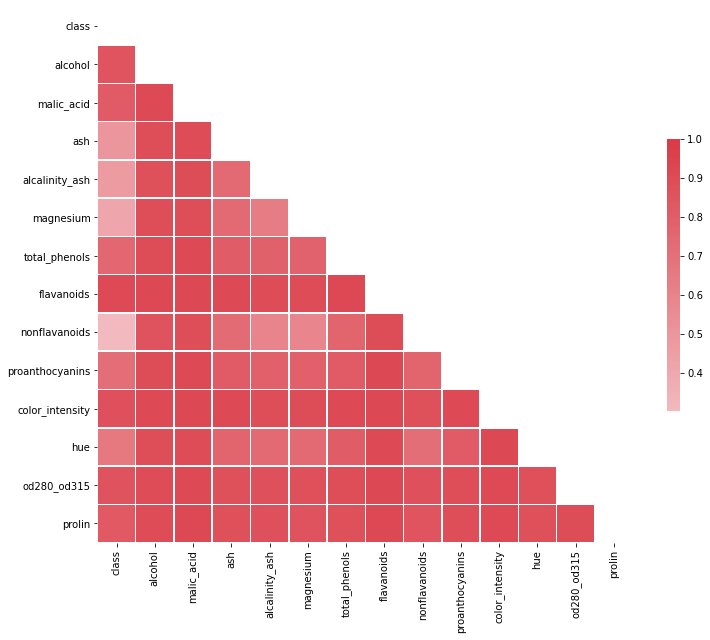

In [ ]:
from sklearn.metrics import normalized_mutual_info_score as nmi
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# All variables
nmi_df = pd.DataFrame(columns=df.columns, index=df.columns)

for col_1 in nmi_df.columns:
    for col_2 in nmi_df.columns:
        nmi_df.loc[col_1, col_2] = nmi(df[col_1], df[col_2], average_method="min")

for col in nmi_df.columns:
    nmi_df[col] = pd.to_numeric(nmi_df[col])

for col in nmi_df.columns:
    nmi_df[col] = nmi_df[col].astype("float64")        

# Generate a mask for the upper triangle
mask = np.zeros_like(nmi_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(nmi_df, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
ordered_columns_nmi = nmi_df["class"].sort_values(ascending=False).index
nmi_df["class"].sort_values(ascending=False)

class              1.000000
flavanoids         0.906775
color_intensity    0.874434
od280_od315        0.859734
alcohol            0.855628
prolin             0.830691
malic_acid         0.819622
total_phenols      0.753924
proanthocyanins    0.712365
hue                0.664655
ash                0.501869
alcalinity_ash     0.469609
magnesium          0.406014
nonflavanoids      0.302464
Name: class, dtype: float64

We observe that feature variables are very related between them (at least in a bivariate sense). With respect to the class variable, in general most variables are directly related with it, but there are some that are less related to it such as the quantities of nonflavanoids

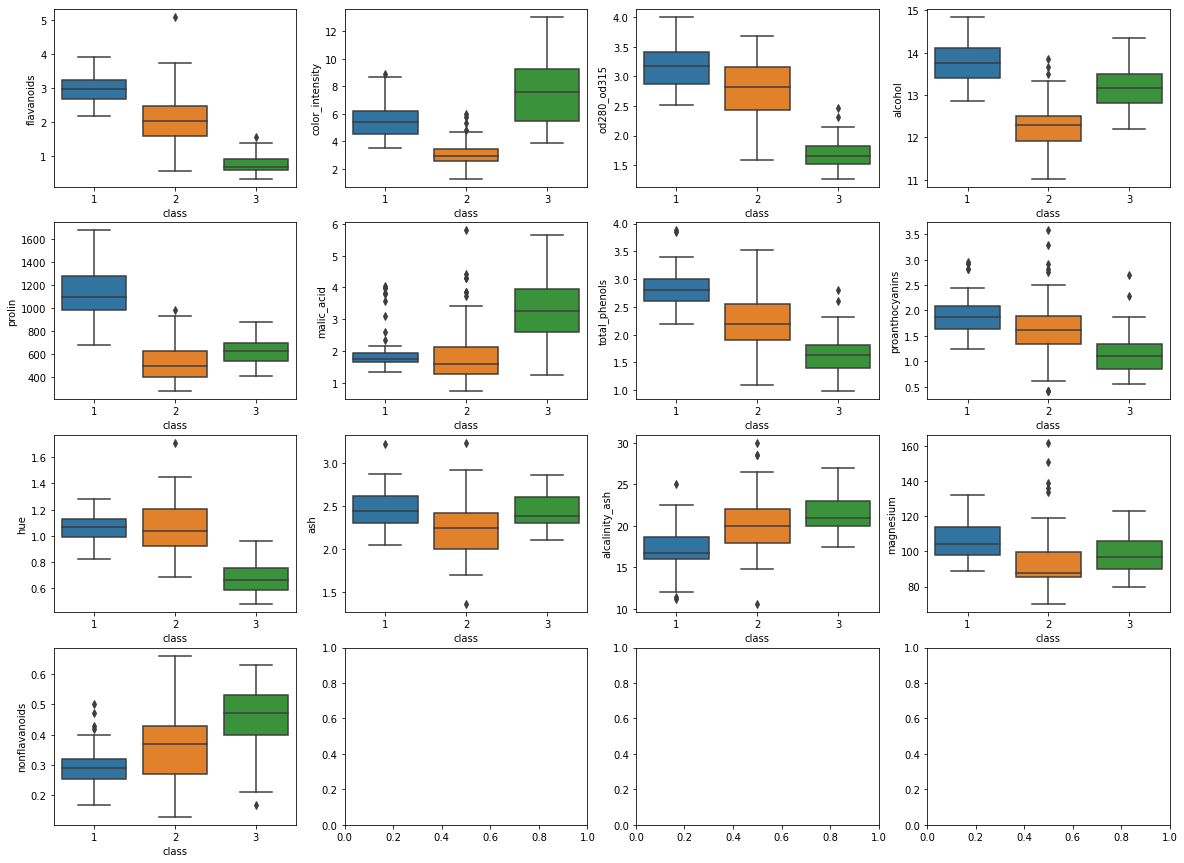

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 15))
axs = axs.flatten()

index = 0
for colname in ordered_columns_nmi:
    if colname != "class":
        sns.boxplot(ax=axs[index], x="class", y=colname, data=df)
        index += 1

<h2 id="#classification">3 - Classification</h2>

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["class"])
Y = df["class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

modelo = LogisticRegression(max_iter=10000)
modelo.fit(X = X_train, y = Y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Accuracy de entrenamiento:", modelo.score(X, Y))

Intercept: [-13.851995    19.15088822  -5.29889322]
Coeficiente: [('alcohol', 0.49043852605517757), ('malic_acid', 0.42841888548281276), ('ash', 0.36928519847814606), ('alcalinity_ash', -0.3396242755664609), ('magnesium', -0.00021351960802484771), ('total_phenols', 0.3170475650741366), ('flavanoids', 0.5927183145959843), ('nonflavanoids', 0.0076985405939638115), ('proanthocyanins', 0.15273516584619007), ('color_intensity', 0.18409113317399692), ('hue', -0.01186348941756664), ('od280_od315', 0.4980139638963845), ('prolin', 0.010902409685877412)]
Accuracy de entrenamiento: 0.9831460674157303


In [ ]:
predicciones = modelo.predict_proba(X = X_test)
predicciones = pd.DataFrame(predicciones, columns = modelo.classes_)
predicciones.head(3)

,1,2,3
0,0.990333,7.166601e-03,0.002501
1,0.024344,9.742725e-01,0.001383
2,0.999998,6.885180e-11,0.000002


In [ ]:
Y_train == Y_train[0]

54      True
140    False
148    False
81     False
88     False
       ...  
8       True
73     False
144    False
118    False
99     False
Name: class, Length: 142, dtype: bool

In [ ]:
predicciones = modelo.predict_proba(X_train)
predicciones = pd.DataFrame(predicciones, columns = modelo.classes_)

In [ ]:
predicciones

,1,2,3
0,0.999297,0.000036,0.000667
1,0.003781,0.149491,0.846727
2,0.000529,0.000043,0.999428
3,0.101004,0.890318,0.008678
4,0.001317,0.994557,0.004126
...,...,...,...
137,0.999915,0.000017,0.000068
138,0.185582,0.783690,0.030728
139,0.018592,0.000009,0.981399
140,0.000416,0.987144,0.012439


In [ ]:
predicciones.shape

(36, 3)

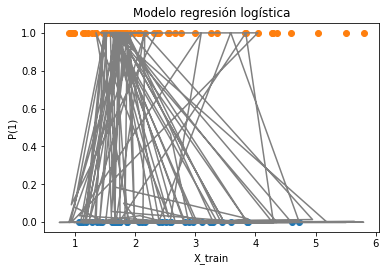

In [ ]:

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(
    X_train.iloc[Y_train[(Y_train == 1)].index, 1],
    Y_train[(Y_train == 1)]-1
)
ax.scatter(
    X_train.iloc[Y_train[(Y_train == 2)].index, 1],
    Y_train[(Y_train == 2)]-1
)
ax.plot(X_train.iloc[:,1], predicciones.iloc[:,0], color = "gray")
ax.set_title("Modelo regresión logística")
ax.set_ylabel("P(1)")
ax.set_xlabel("X_train");

In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
modelo_t1 = sm.Logit(endog=(Y_train == Y_train[0]), exog=X_train, maxiter=1000)
modelo_t1 = modelo_t1.fit()
print(modelo_t1.summary())

         Current function value: inf
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: ignored

<h3 id="#svm">3.1 - SVM</h3>

##### Linear kernel

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_linear = SVC(kernel="linear")

scores = cross_val_score(svm_linear, X_train, Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))
scores

Cross-val score: 0.9371428571428572


array([0.93333333, 0.86666667, 0.78571429, 1.        , 0.92857143,
       1.        , 0.92857143, 1.        , 1.        , 0.92857143])

##### RBF kernel

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_rbf = SVC(kernel="rbf")

scores = cross_val_score(svm_rbf, X_train, Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.6685714285714287


##### Polynomial kernel

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_poly = SVC(kernel="poly", degree=3)

scores = cross_val_score(svm_poly, X_train, Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.6752380952380952


We have tried several kernels. For this problem it seems that the best working one is the linear kernel.

<h3 id="#decision_tree">3.2 - Decision tree</h3>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt_clas = DecisionTreeClassifier(random_state=0)

scores = cross_val_score(dt_clas, X_train, Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.9014285714285715


<h3 id="#knn">3.3 - KNN</h3>

##### $k = 3$

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_clas_3 = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn_clas_3, X_train, Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.7323809523809525


##### $k = 5$

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_clas_5 = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn_clas_5, X_train, Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.7176190476190476


##### $k = 10$

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_clas_10 = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn_clas_10, X_train, Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.7380952380952381


Using the cross-validated accuracy score, we select the best setting of the KNN with $k = 3$. It will be used in the final comparison with the test dataset.

<h3 id="#naive_bayes">3.4 - Naïve Bayes</h3>

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

naive_bayes = GaussianNB()
scores = cross_val_score(naive_bayes, X_train, Y_train, cv=10) # By default we use the R2 score
print("Cross-val score: " + str(scores.mean()))

Cross-val score: 0.9861904761904763


<h2 id="#estimator_evaluation">4 - Estimator evaluation</h2>

In [ ]:
svm_fitted = svm_linear.fit(X_train, Y_train)
dt_clas_fitted = dt_clas.fit(X_train, Y_train)
knn_clas_fitted = knn_clas_5.fit(X_train, Y_train)
naive_bayes_fitted = naive_bayes.fit(X_train, Y_train)

In [ ]:
print("SVM test score: " + str(svm_fitted.score(X_test, Y_test)))
print("Decision tree test score: " + str(dt_clas_fitted.score(X_test, Y_test)))
print("KNN test score: " + str(knn_clas_fitted.score(X_test, Y_test)))
print("Naive Bayes test score: " + str(naive_bayes_fitted.score(X_test, Y_test)))

SVM test score: 0.9166666666666666
Decision tree test score: 0.8611111111111112
KNN test score: 0.6666666666666666
Naive Bayes test score: 0.9166666666666666


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
predicciones = svm_fitted.predict(X = X_test,)

print("Matriz de confusión")
print("-------------------")
confusion_matrix(
    y_true    = Y_test,
    y_pred    = predicciones
)

Matriz de confusión
-------------------


array([[16,  1,  0],
       [ 1, 10,  0],
       [ 0,  1,  7]])

In [ ]:
accuracy = accuracy_score(
            y_true    = Y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 91.66666666666666 %


## Extra: Predict class probabilities with Naïve Bayes

The Naive Bayes is a probabilistic classifier and thus we can use new data to predict the probability of each class state. For example:

In [ ]:
X_test.head(20)

,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflavanoids,proanthocyanins,color_intensity,hue,od280_od315,prolin
28,13.87,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915
66,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
17,13.83,1.57,2.62,20.0,115,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130
138,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580
166,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695
48,14.10,2.02,2.40,18.8,103,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060
40,13.56,1.71,2.31,16.2,117,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830


In [ ]:
Y_test.head(20)

28     1
66     2
3      1
17     1
138    3
166    3
48     1
40     1
95     2
25     1
39     1
55     1
133    3
101    2
142    3
26     1
126    2
43     1
84     2
21     1
Name: class, dtype: int64

In [ ]:
naive_bayes_fitted.predict_proba(X_test.head(20))

array([[9.99996141e-01, 3.85936881e-06, 6.59594998e-32],
       [1.06813532e-01, 8.93186468e-01, 3.16247153e-31],
       [1.00000000e+00, 3.68562191e-20, 1.96842925e-48],
       [1.00000000e+00, 9.09693661e-11, 4.68161636e-31],
       [3.17213598e-23, 5.43564004e-07, 9.99999456e-01],
       [1.06308422e-20, 8.78074656e-20, 1.00000000e+00],
       [1.00000000e+00, 9.73786247e-11, 2.33740535e-26],
       [9.99999828e-01, 1.72363937e-07, 8.64273394e-33],
       [9.10569567e-05, 9.99908943e-01, 2.63781528e-23],
       [7.59555733e-04, 9.99240444e-01, 3.69796575e-23],
       [9.99982215e-01, 1.77852370e-05, 5.63045754e-29],
       [1.00000000e+00, 3.53515386e-10, 2.60840032e-27],
       [4.72144398e-18, 1.96225649e-04, 9.99803774e-01],
       [5.44627948e-12, 9.99999999e-01, 1.03784599e-09],
       [2.43858449e-20, 3.23019342e-04, 9.99676981e-01],
       [9.99999989e-01, 1.14965783e-08, 2.21882339e-29],
       [8.42604853e-08, 9.99999916e-01, 8.97669244e-21],
       [7.95328256e-02, 9.20467

In [ ]:
# Datos
# ==============================================================================
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/' \
       + 'Estadistica-machine-learning-python/master/data/ESL.mixture.csv'
datos = pd.read_csv(url)
datos.head(3)

,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0


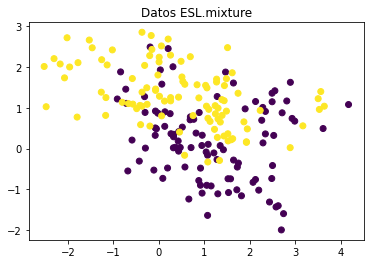

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos.X1, datos.X2, c=datos.y);
ax.set_title("Datos ESL.mixture");

In [ ]:
X = datos.drop(columns = 'y')
y = datos['y']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, kernel='linear', random_state=123)

In [ ]:
import numpy as np

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


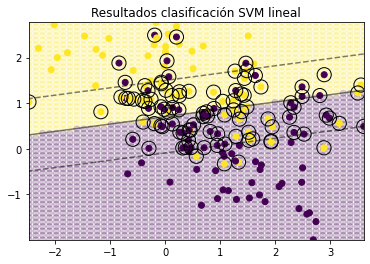

In [ ]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors = 'k',
    levels = [-1, 0, 1],
    alpha  = 0.5,
    linestyles = ['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM lineal");

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.logspace(-5, 7, 20)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = SVC(kernel= "rbf", gamma='scale'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
8,1.128838,0.762520,0.023223,0.790778,0.035372
12,379.269019,0.750641,0.076068,0.868777,0.007168
7,0.263665,0.750175,0.030408,0.778228,0.026049
9,4.83293,0.744118,0.044428,0.815729,0.026199
11,88.586679,0.738062,0.064044,0.859431,0.019840


In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 1.1288378916846884} : 0.7625203820172374 accuracy


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


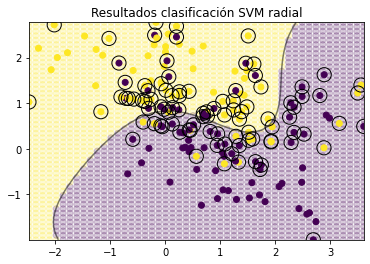

In [ ]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors='k',
    levels=[0],
    alpha=0.5,
    linestyles='-'
)

ax.set_title("Resultados clasificación SVM radial");